## Titanic Dataset for Exploratory Data Analysis and ML Model building

<br />


<br />



* In this notebook we will work on the Famous Titanic Datset and do some exploratory data analysis on the dataset and try to get some information on the passengers of the ship

In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
train_df = pd.read_csv(r'train.csv')
test_df = pd.read_csv(r'test.csv')

In [106]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


*from above we can see that the **Age** ,**Cabin**, **Embarked** have some missing/non null values and we have to find a way to deal with those missing values*
<br />

<br />


In [107]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


*describe() method gives the statistics of each column of the dataframe as shown above*
<br />
<br />
*Column **Survived** provides the data whether a passenger surived the disaster, 1 means Survived and 0 means not survived and the stats. show that unfortunately only ~38% of them survived the disaster*

*Let's fill the missing values of **Age** with the mean of the age of all passengers*

In [108]:
train_df['Age'].fillna(value=train_df['Age'].mean(),inplace=True)

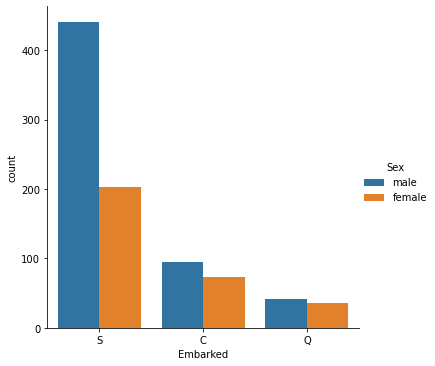

In [109]:
%matplotlib inline
#plot of Sex vs count
sns.catplot(x='Embarked',data=train_df,hue='Sex',kind='count')

*From above plot we can see that most people embarked at **Southampton = 'S'** port*

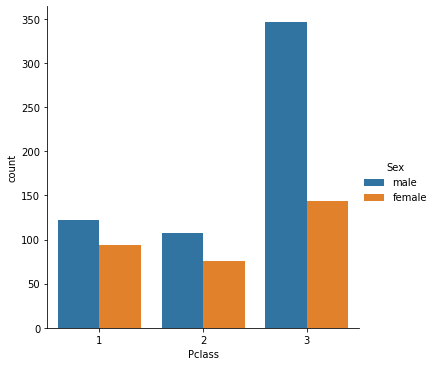

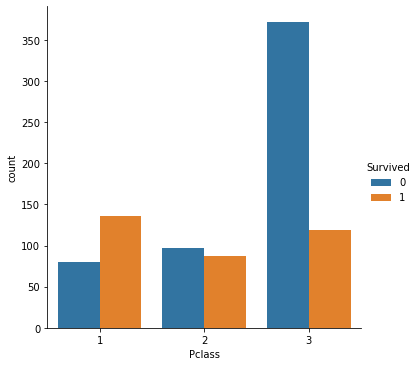

In [110]:
#plot of  Pclass vs count

sns.catplot(x='Pclass',data=train_df,hue='Sex',kind='count')

sns.catplot(x='Pclass',data=train_df,hue='Survived',kind='count')




*From the above plot we can see that there are  more people in the 3rd class is more than 2nd and 1st class combined and also the 3rd class people are the most who could not survive*

In [111]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [112]:
train_df.drop(columns=['Cabin'],inplace=True)

In [113]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [114]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

*Since most people Embarked at 'S' let fill the Nan values to 'S'*

In [115]:
train_df['Embarked'].fillna('C',inplace=True)

In [116]:
#now lets investigate the survival rate based on the Pclass
def histplot_pclass(pclass):
    survived = train_df['Survived'].loc[train_df['Pclass']==pclass].sum()
    total = train_df[train_df['Pclass']==pclass].shape
    x = [survived,total[0]-survived]
    y=[0,1]
    print('class:{} , survived:{} , survival %: {}'.format(pclass,survived,survived*100/total[0]))

In [117]:
for i in range(1,4):
    histplot_pclass(i)     

class:1 , survived:136 , survival %: 62.96296296296296
class:2 , survived:87 , survival %: 47.28260869565217
class:3 , survived:119 , survival %: 24.236252545824847



*From above we can see that class 1 has the highest survival rate compared to lower classes of people*

<br />
<br />

*Now Let's drop the **name** and **ticket** column for now*

In [118]:
X =  train_df.copy()
X.drop(columns=['Name','Ticket'],inplace=True)

*Let's encode the **sex** and **Embarked** values to numerical values*

In [119]:
X = pd.get_dummies(X,columns=['Sex'])


In [120]:
embarked_label = pd.DataFrame(list(map(lambda x:0 if x == 'S' else (1 if x=='C' else 2), X['Embarked'])),columns=['Embarked_label'])
X = pd.concat([X,embarked_label],axis=1)

In [121]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Age             891 non-null    float64
 4   SibSp           891 non-null    int64  
 5   Parch           891 non-null    int64  
 6   Fare            891 non-null    float64
 7   Embarked        891 non-null    object 
 8   Sex_female      891 non-null    uint8  
 9   Sex_male        891 non-null    uint8  
 10  Embarked_label  891 non-null    int64  
dtypes: float64(2), int64(6), object(1), uint8(2)
memory usage: 64.5+ KB


*dropping the **PassengerId**, **Embarked**, **Survived** columns for training ML models*

In [122]:
y = X['Survived']

X.drop(columns=['PassengerId','Embarked','Survived'],inplace=True)

In [123]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_label
0,3,22.000000,1,0,7.2500,0,1,0
1,1,38.000000,1,0,71.2833,1,0,1
2,3,26.000000,0,0,7.9250,1,0,0
3,1,35.000000,1,0,53.1000,1,0,0
4,3,35.000000,0,0,8.0500,0,1,0
...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,0
887,1,19.000000,0,0,30.0000,1,0,0
888,3,29.699118,1,2,23.4500,1,0,0
889,1,26.000000,0,0,30.0000,0,1,1


*Splitting the training set into **train set** and **validation set** to test the model on vali. set before moving to test set*

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

*We build different Ml models to fit our data as shown below*

* Logistic RegressionCV
* Random Forest Classifier
* SGD Classifier
* SVC

In [183]:
from sklearn.linear_model import LogisticRegressionCV
logreg_model= LogisticRegressionCV(cv=5,random_state=42,solver='liblinear').fit(X_train,y_train)
y_test_predict = logreg_model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_predict)


0.7821229050279329

In [188]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(max_depth=9,random_state=42).fit(X,y)
y_test_rfc = rfc_model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_rfc)


0.8659217877094972

In [185]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

sgd_model = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3,alpha=0.01,learning_rate='optimal')) 

sgd_model.fit(X_train,y_train)
y_test_sgd = sgd_model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_sgd)

0.7821229050279329

In [186]:
from sklearn.svm import SVC
svm_model = SVC(kernel="linear",C=0.025,random_state=42).fit(X_train,y_train)

y_test_svm = svm_model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_svm)

0.7821229050279329

*Now we feature engineer the test data so that our model can predict the outcome*

In [127]:
test_df = test_df.drop(columns=['Name','Ticket','Cabin'])

In [128]:
PassengerId =test_df['PassengerId']
test_df.pop('PassengerId')
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [129]:
test_df = pd.get_dummies(test_df,columns=['Sex'])
test_df

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,3,34.5,0,0,7.8292,Q,0,1
1,3,47.0,1,0,7.0000,S,1,0
2,2,62.0,0,0,9.6875,Q,0,1
3,3,27.0,0,0,8.6625,S,0,1
4,3,22.0,1,1,12.2875,S,1,0
...,...,...,...,...,...,...,...,...
413,3,NaN,0,0,8.0500,S,0,1
414,1,39.0,0,0,108.9000,C,1,0
415,3,38.5,0,0,7.2500,S,0,1
416,3,NaN,0,0,8.0500,S,0,1


In [130]:
embarked_label = pd.DataFrame(list(map(lambda x:0 if x == 'S' else (1 if x=='C' else 2), test_df['Embarked'])),columns=['Embarked_label'])
test_df = pd.concat([test_df,embarked_label],axis=1)
test_df.drop(columns=['Embarked'],inplace=True)

In [131]:
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pclass          418 non-null    int64  
 1   Age             418 non-null    float64
 2   SibSp           418 non-null    int64  
 3   Parch           418 non-null    int64  
 4   Fare            418 non-null    float64
 5   Sex_female      418 non-null    uint8  
 6   Sex_male        418 non-null    uint8  
 7   Embarked_label  418 non-null    int64  
dtypes: float64(2), int64(4), uint8(2)
memory usage: 20.5 KB


In [189]:
y_test_rfc = rfc_model.predict(test_df)

*Now we can convert the predictions into csv file to test our model accuracy*

In [190]:
a = np.column_stack([PassengerId.astype(np.int32),y_test_rfc])
df_csv = pd.DataFrame(a,columns=['PassengerId','Survived'])
df_csv["PassengerId"] = df_csv["PassengerId"].astype(int)
df_csv.to_csv('mytitanic.csv',index=False)

*After observing all the models we get an accuracy of 78% on the Random Forest Regressor Model*